<a href="https://colab.research.google.com/github/heysourin/A-B-Testing/blob/main/a_b_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d faviovaz/marketing-ab-testing

Dataset URL: https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing
License(s): CC0-1.0
marketing-ab-testing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/marketing-ab-testing.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Data, extracted!")

Data, extracted!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('marketing_AB.csv')

In [ ]:
df.shape

(588101, 7)

In [ ]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
user id,0
test group,0
converted,0
total ads,0
most ads day,0
most ads hour,0


In [ ]:
df.duplicated(subset='user id').sum()

0

In [ ]:
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]

In [ ]:
for i in df_cat.columns:
  print(i.upper(),':', df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


---
## **Univariate analysis:**

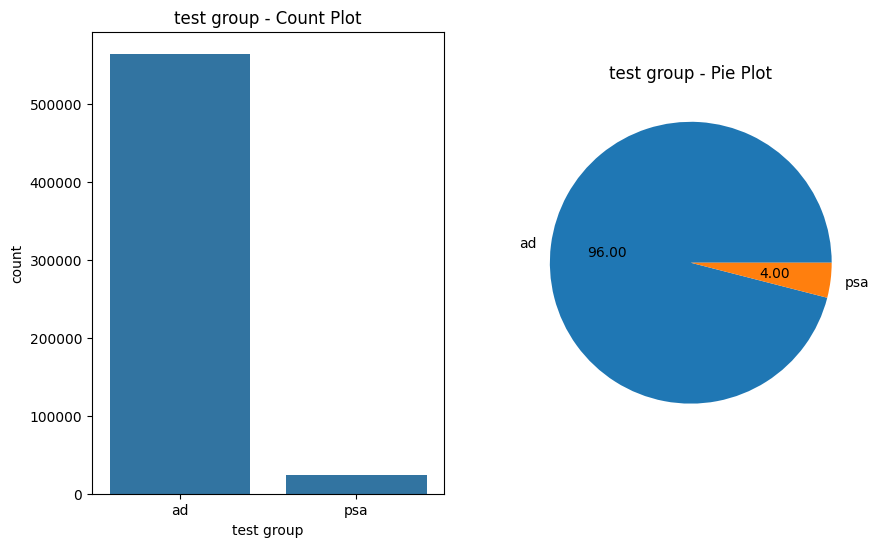

In [ ]:
variable = 'test group'
plt.figure(figsize=(10,6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f"{variable} - Count Plot")

# Count plot
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()

plt.pie(counts, labels=counts.index, autopct='%0.2f')
plt.title(f"{variable} - Pie Plot")

plt.show()

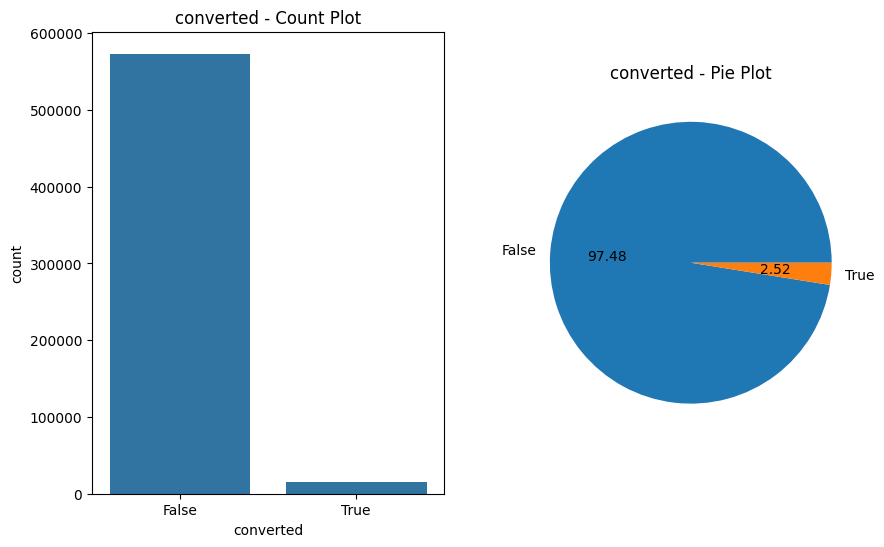

In [ ]:
variable = 'converted'
plt.figure(figsize=(10,6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f"{variable} - Count Plot")

# Count plot
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()

plt.pie(counts, labels=counts.index, autopct='%0.2f')
plt.title(f"{variable} - Pie Plot")

plt.show()

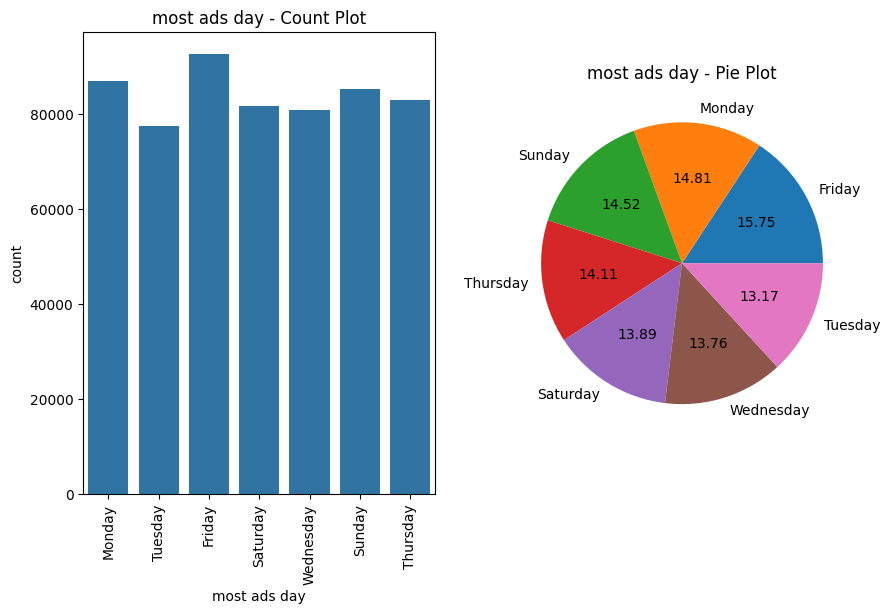

In [ ]:
variable = 'most ads day'
plt.figure(figsize=(10,6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f"{variable} - Count Plot")
plt.xticks(rotation=90)

# Count plot
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()

plt.pie(counts, labels=counts.index, autopct='%0.2f')
plt.title(f"{variable} - Pie Plot")

plt.show()

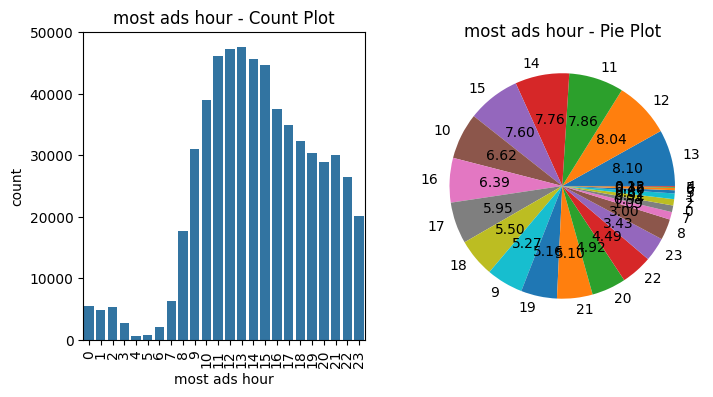

In [ ]:
variable = 'most ads hour'
plt.figure(figsize=(8, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f"{variable} - Count Plot")
plt.xticks(rotation=90)

# Count plot
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()

plt.pie(counts, labels=counts.index, autopct='%0.2f')
plt.title(f"{variable} - Pie Plot")

plt.show()

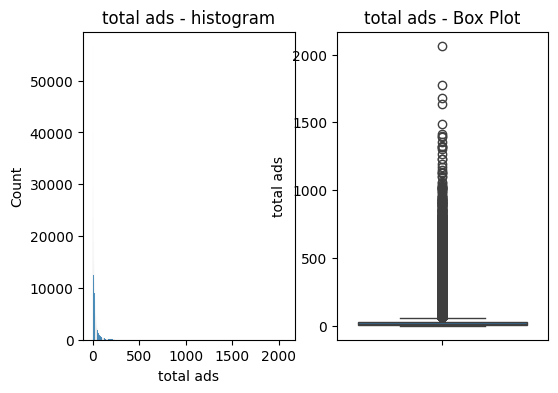

In [ ]:
variable = 'total ads'
plt.figure(figsize=(6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.title(f"{variable} - histogram")

# Count plot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df)
plt.title(f"{variable} - Box Plot")

plt.show()

In [ ]:
df['total ads'].describe().T

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


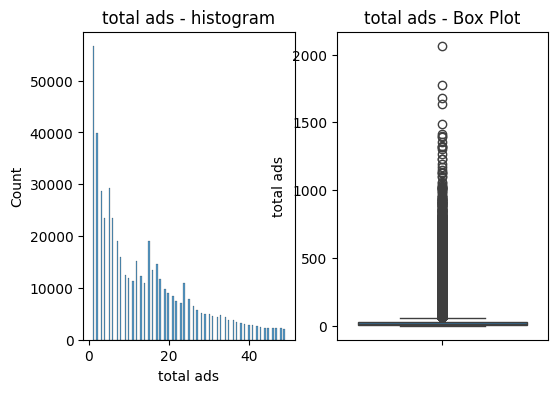

In [ ]:
variable = 'total ads'
plt.figure(figsize=(6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df[df['total ads']<50])
plt.title(f"{variable} - histogram")

# Count plot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df)
plt.title(f"{variable} - Box Plot")

plt.show()

---
## **Bivariate Analysis:**

In [ ]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [ ]:
for i in df_cat.columns:
  print(i,':', df_cat[i].unique())

test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


In [ ]:
# Converting categorical features to numerical data as I am gonna plot heatmap.
df['test group'] = df['test group'].map({'psa': 0, 'ad':1})

df['converted'] = df['converted'].map({False: 0, True:1})

df['most ads day'] = df['most ads day'].map({'Monday': 1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6,'Sunday':7,})

In [ ]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,1,0,130,1,20
1,1,0,93,2,22
2,1,0,21,2,18
3,1,0,355,2,10
4,1,0,276,5,14


<Axes: >

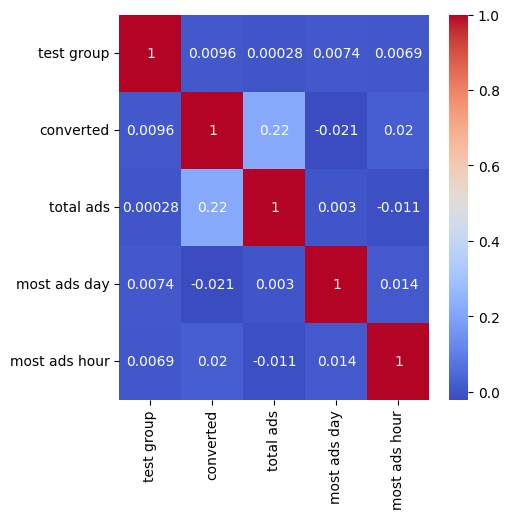

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

---
## **Statistical:**

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable != 'converted':
    contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"\nTest for Chi-squared test for *{variable}* vs. converted:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")

    if p < alpha:
      print(f"Reject the null hypothesis. There is a significant association between the variables,\n the difference in conversion rates accross *{variable}* is statistically significant.")
    else:
      print(f"Fail to reject the null hypothesis. There is no significant association between the variables, there is no significant difference in conversion rates accross **{variable}**.")
    print("----------------------------------------------------")


Test for Chi-squared test for *test group* vs. converted:
Chi-squared statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
Reject the null hypothesis. There is a significant association between the variables,
 the difference in conversion rates accross *test group* is statistically significant.
----------------------------------------------------

Test for Chi-squared test for *most ads day* vs. converted:
Chi-squared statistic: 410.0478857936585
P-value: 1.932184379244731e-85
Reject the null hypothesis. There is a significant association between the variables,
 the difference in conversion rates accross *most ads day* is statistically significant.
----------------------------------------------------

Test for Chi-squared test for *most ads hour* vs. converted:
Chi-squared statistic: 430.76869230822086
P-value: 8.027629823696771e-77
Reject the null hypothesis. There is a significant association between the variables,
 the difference in conversion rates accross *most ads hour*

In [ ]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Step 1: checking assumptions

# Normality assumptions
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == 1]['total ads']) # 1--> converted
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == 0]['total ads']) # 0--> did not convert

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']==1]['total ads'], df[~df['converted']==0]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for equality of variances: p-value = nan


In [ ]:
# Set the significance level
alpha = 0.05

# Check the assumptions
if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  # Perform an independent two-sample t-test
  t_stat, t_p_value = ttest_ind(df[df['converted'] == 1]['total ads'], df[df['converted'] == 0]['total ads'])
  print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
  # Perform the Mann-Whitney U test
  u_stat, u_p_value = mannwhitneyu(df[df['converted'] == 1]['total ads'], df[df['converted'] == 0]['total ads'])
  print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0
